## Observations and Insights 

Generally, Capomulin shows evidence that it can limit the size of tumors in mice, particularly when compared to Infubinol and Ceftamin.

A case study of mouse m957 shows that the tumor size decreased consistently during the trial.

Finally, tumor size is strongly correlated with the weight of the mouse.

Further research would need to be done to determine if Capomulin effectively reduced tumor size is a sizeable portion of mice exposed to it, as well as whether mouse size, age, and/or sex have any relation to the effectiveness of the drug.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results_fixed.csv"

# removed duplicate rows via Excel, updated data in _fixed csv

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1875,z969,25,63.145652,2,Naftisol,Male,9,30
1876,z969,30,65.841013,3,Naftisol,Male,9,30
1877,z969,35,69.176246,4,Naftisol,Male,9,30
1878,z969,40,70.314904,4,Naftisol,Male,9,30


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

groupbydrug = merge_df.groupby("Drug Regimen")

drugmean = groupbydrug.mean()["Tumor Volume (mm3)"]
drugmedian = groupbydrug.median()["Tumor Volume (mm3)"]
drugvar = groupbydrug.var()["Tumor Volume (mm3)"]
drugstddev = groupbydrug.std()["Tumor Volume (mm3)"]
drugsem = groupbydrug.sem()["Tumor Volume (mm3)"]

statisticalsummary_df = pd.DataFrame({"Mean Volume":drugmean,
                                     "Median Volume":drugmedian,
                                     "Volume Variance":drugvar,
                                     "Volume Std Dev":drugstddev,
                                     "Volume SEM":drugsem})

statisticalsummary_df

,Mean Volume,Median Volume,Volume Variance,Volume Std Dev,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregatedsummary_df = groupbydrug.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
aggregatedsummary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

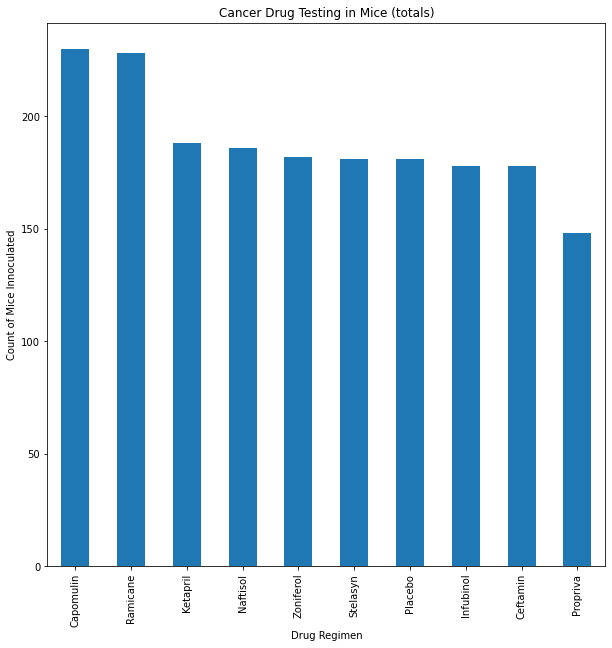

In [64]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drugcounts = merge_df["Drug Regimen"].value_counts()
plt.figure(figsize=(10,10))
drugcounts.plot(kind="bar")
plt.title("Cancer Drug Testing in Mice (totals)")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice Innoculated")
plt.show()

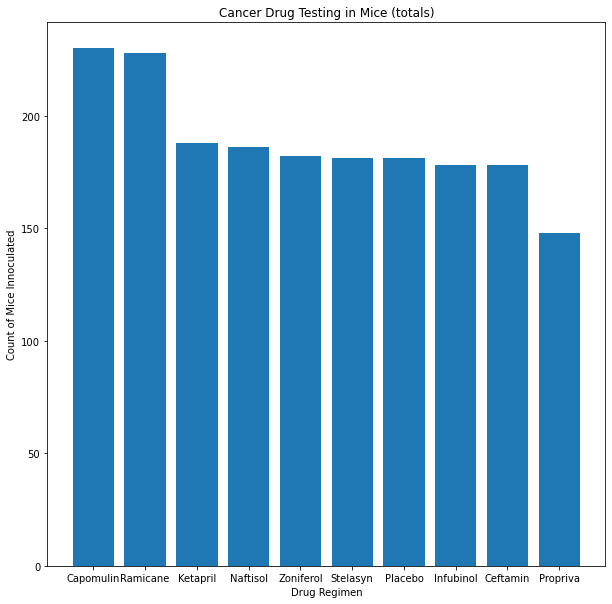

In [65]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(10,10))
plt.bar(drugcounts.index.values,drugcounts.values)

plt.title("Cancer Drug Testing in Mice (totals)")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice Innoculated")

plt.show()

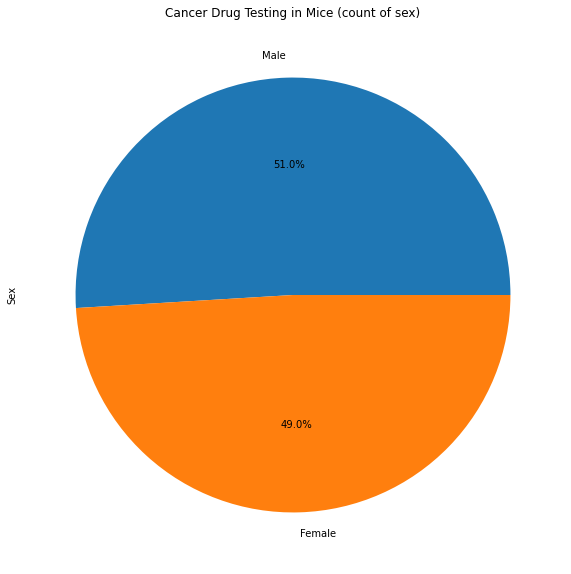

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sexcounts = merge_df["Sex"].value_counts()
plt.figure(figsize=(10,10))
sexcounts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Cancer Drug Testing in Mice (count of sex)")
plt.show()

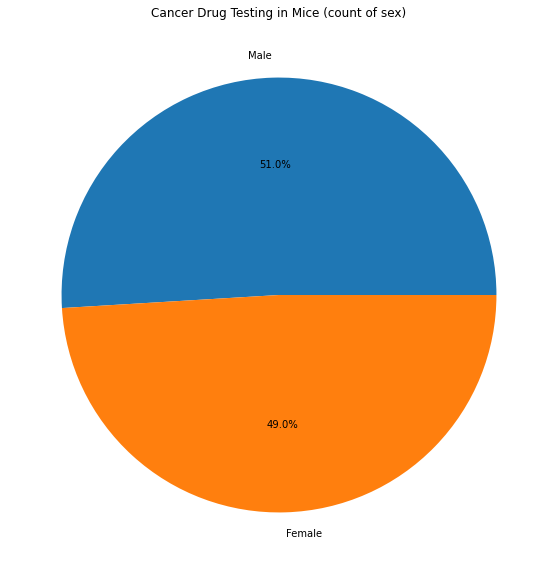

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(10,10))
plt.pie(sexcounts.values, labels=sexcounts.index.values, autopct="%1.1f%%")
plt.title("Cancer Drug Testing in Mice (count of sex)")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# code to pull only max rows by column in a groupby found here https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-count-in-groups-using-groupby
groupbymouse = merge_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
fullmerge_maxonly = groupbymouse.merge(merge_df,on=["Mouse ID","Timepoint"],how="left")
fullmerge_maxonly

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []

for drug in druglist:
    drugvolumelist = fullmerge_maxonly.loc[fullmerge_maxonly["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tumorvoldata.append(drugvolumelist)
    
    # Determine outliers using upper and lower bounds
    # taken nearly wholesale from /05-Matplotlib/3/Activities/02-Ins_Quartiles_and_Outliers
    quartiles = drugvolumelist.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug} lower quartile: {lowerq}")
    print(f"{drug} upper quartile: {upperq}")
    print(f"{drug} interquartile range: {iqr}")
    print(f"{drug} lower bound for outliers: {lower_bound}")
    print(f"{drug} upper bound for outliers: {upper_bound}")
    print("-------")

Capomulin lower quartile: 32.37735684
Capomulin upper quartile: 40.1592203
Capomulin interquartile range: 7.781863460000004
Capomulin lower bound for outliers: 20.70456164999999
Capomulin upper bound for outliers: 51.83201549
-------
Ramicane lower quartile: 31.56046955
Ramicane upper quartile: 40.65900627
Ramicane interquartile range: 9.098536719999998
Ramicane lower bound for outliers: 17.912664470000003
Ramicane upper bound for outliers: 54.30681135
-------
Infubinol lower quartile: 54.04860769
Infubinol upper quartile: 65.52574285
Infubinol interquartile range: 11.477135160000003
Infubinol lower bound for outliers: 36.83290494999999
Infubinol upper bound for outliers: 82.74144559000001
-------
Ceftamin lower quartile: 48.72207785
Ceftamin upper quartile: 64.29983003
Ceftamin interquartile range: 15.577752179999997
Ceftamin lower bound for outliers: 25.355449580000002
Ceftamin upper bound for outliers: 87.66645829999999
-------


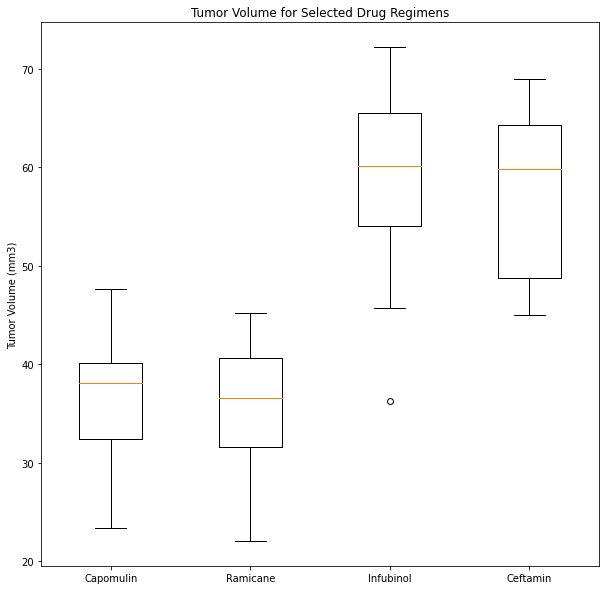

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.set_title("Tumor Volume for Selected Drug Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(druglist)
ax1.boxplot(tumorvoldata, )

plt.show()

## Line and Scatter Plots

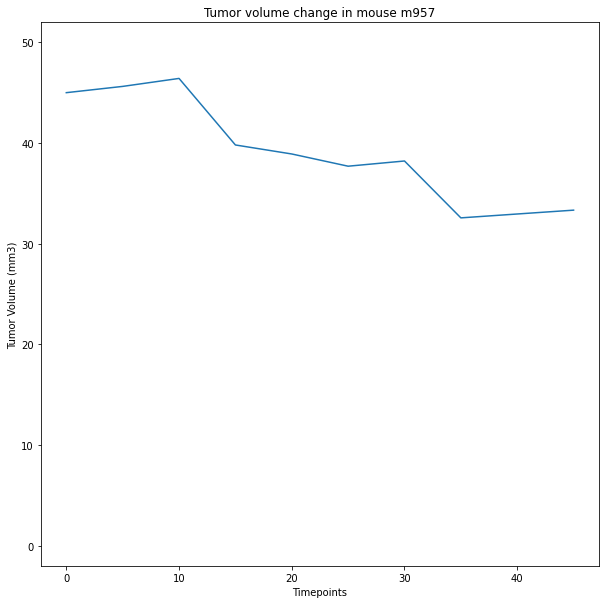

In [75]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# mouse m957
m957data = merge_df.loc[merge_df["Mouse ID"] == "m957",:]
plt.figure(figsize=(10,10))
plt.plot(m957data["Timepoint"],m957data["Tumor Volume (mm3)"])

plt.title("Tumor volume change in mouse m957")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(top=52,bottom=-2)
plt.show()

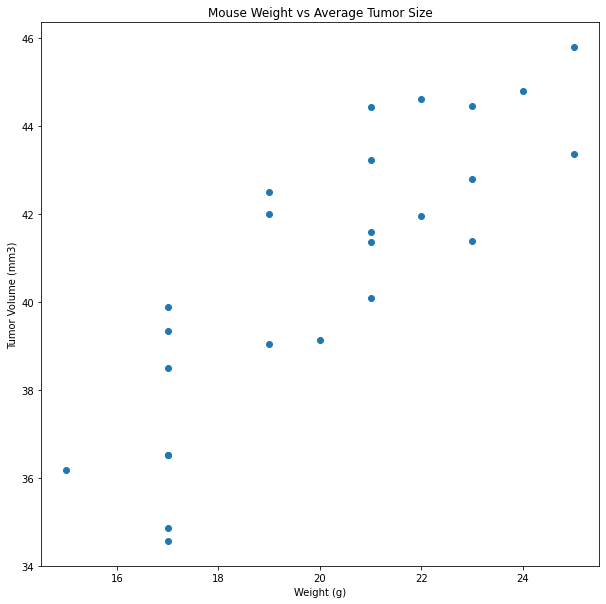

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
avgsdata = scatter_data.groupby(["Mouse ID"]).mean()
avgtumorsize = avgsdata["Tumor Volume (mm3)"]
avgmouseweight = avgsdata["Weight (g)"]

plt.figure(figsize=(10,10))
plt.scatter(avgmouseweight,avgtumorsize)
plt.title("Mouse Weight vs Average Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient is 0.8419363424694717


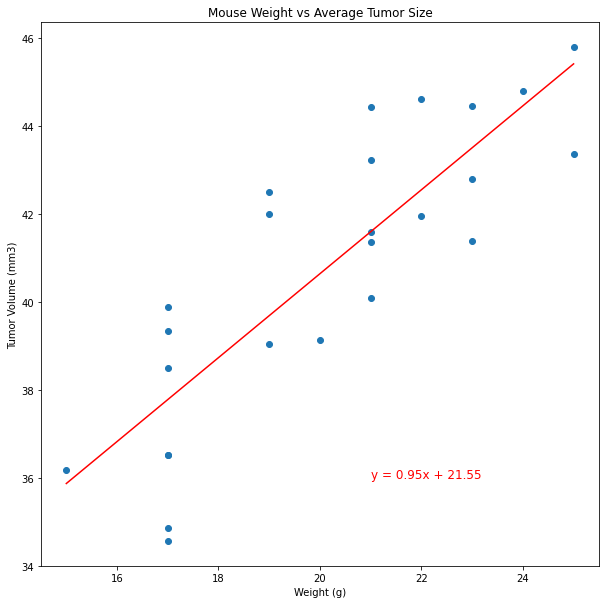

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlcoeff = st.pearsonr(avgmouseweight,avgtumorsize)
print(f"The correlation coefficient is {correlcoeff[0]}")
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(avgmouseweight,avgtumorsize)

x_values = range(15,26,1)
y_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,10))
plt.scatter(avgmouseweight,avgtumorsize)
plt.plot(x_values,y_values,"r-")
plt.annotate(line_eq,(21,36),fontsize=12,color="red")
plt.title("Mouse Weight vs Average Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()